<a href="https://colab.research.google.com/github/JudahSan/Apollo-11/blob/master/AlgorithmicTradingStrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses the dual moving average crossover to determine when to buy stock

In [37]:
#Import the libraries
import pandas_datareader as  web
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as  pdr

plt.style.use('fivethirtyeight')

In [60]:
#Load the data
AAPL = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2020-07-27')
AAPL.reset_index(level=0, inplace=True)
AAPL

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
1,2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2,2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
4,2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...,...
2150,2020-07-21,99.250000,96.742500,99.172501,97.000000,103646000.0,96.825424
2151,2020-07-22,97.974998,96.602501,96.692497,97.272499,89001600.0,97.097435
2152,2020-07-23,97.077499,92.010002,96.997498,92.845001,197004400.0,92.677902
2153,2020-07-24,92.970001,89.144997,90.987503,92.614998,185438800.0,92.448311


In [61]:
AAPL.set_index('Date', inplace=True)
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2020-07-21,99.250000,96.742500,99.172501,97.000000,103646000.0,96.825424
2020-07-22,97.974998,96.602501,96.692497,97.272499,89001600.0,97.097435
2020-07-23,97.077499,92.010002,96.997498,92.845001,197004400.0,92.677902


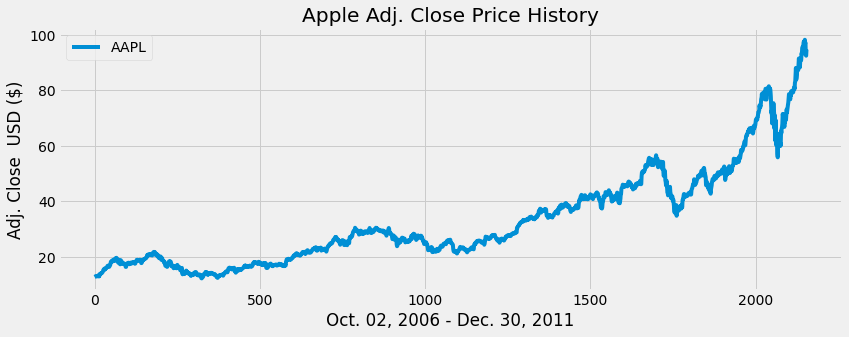

In [50]:
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label ='AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011')
plt.ylabel('Adj. Close  USD ($)')
plt.legend(loc='upper left')
plt.show()

In [51]:
#Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2150,91.392218
2151,91.767375
2152,91.921597
2153,92.209079


In [52]:
#Create  a simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window = 100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2150,77.050092
2151,77.340738
2152,77.523850
2153,77.728284


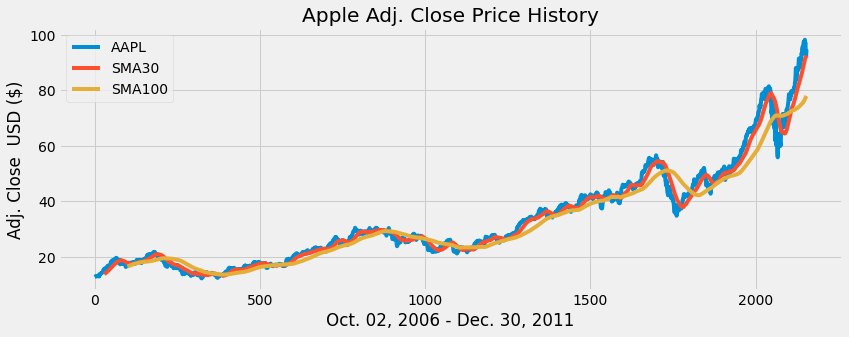

In [53]:
 
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label ='AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011')
plt.ylabel('Adj. Close  USD ($)')
plt.legend(loc='upper left')
plt.show()

In [54]:
#Create a new data frame to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,12.691425,NaN,NaN
1,12.759631,NaN,NaN
2,12.901293,NaN,NaN
3,13.036158,NaN,NaN
4,13.015480,NaN,NaN
...,...,...,...
2150,96.825424,91.392218,77.050092
2151,97.097435,91.767375,77.340738
2152,92.677902,91.921597,77.523850
2153,92.448311,92.209079,77.728284


In [55]:
#Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell=[]
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i]> data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
    
  return (sigPriceBuy, sigPriceSell)

In [56]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [57]:
#Show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,12.691425,NaN,NaN,NaN,NaN
1,12.759631,NaN,NaN,NaN,NaN
2,12.901293,NaN,NaN,NaN,NaN
3,13.036158,NaN,NaN,NaN,NaN
4,13.015480,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2150,96.825424,91.392218,77.050092,NaN,NaN
2151,97.097435,91.767375,77.340738,NaN,NaN
2152,92.677902,91.921597,77.523850,NaN,NaN
2153,92.448311,92.209079,77.728284,NaN,NaN


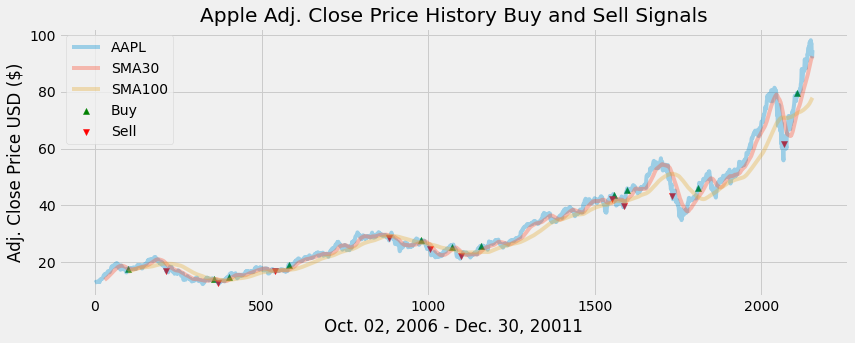

In [58]:
#Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.6, 4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color ='red')
plt.title('Apple Adj. Close Price History Buy and Sell Signals')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 20011')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()